In [7]:
#Logistic Regression the crucial steps - Example: Simmons data
#Importing the Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
#Suppress Warnings
import warnings
warnings.filterwarnings("ignore")
#Reading the File
mydata=pd.read_csv("D:/WORK/Great Lakes/5th Term/PAM/Dataset/Logit-Simmons1.csv")
mydata=mydata.dropna()
mydata.head()

,Customer,Spending,Card,Purchase
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [9]:
#Building the Model

import statsmodels.api as sm
import statsmodels.formula.api as smf
logit = smf.logit("Purchase~Spending+Card",data=mydata)
lg=logit.fit() 
print(lg.summary())
prediction=lg.predict()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Mar 2022   Pseudo R-squ.:                  0.1012
Time:                        14:44:14   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.

In [10]:
#Step1: Overall Validity of the Model:Loglikelyhood
print("LogLikelyhoodRatio=",format(lg.llr_pvalue,"0.6f"))
#Model is Valid

LogLikelyhoodRatio= 0.001098


In [24]:
#Step2"McFadden R Square
McFaddenR2 = 1-(lg.llf/lg.llnull)
print(f"McFadden Rsq= {round(McFaddenR2,6)}")
#print("McFadden Rsq=",format(McFaddenR2,"0.6f"))
#1.Overall, the logistic regression model in this example 
#is statistically significant(PValue=0.001098 is less than alpha(0,05).
#Therefore looks robust.

#2.About 10.12% of the uncertainty produced by the 
#intercept  only model is calibrated or explained by the full model(Intercept+
#slopes of Spending and Card)


McFadden Rsq= 0.10125


In [15]:
# Step3:Test for Significance of Individual coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = "{:0.4f}".format 
lgcoef

,coef,pval
Intercept,-2.1464,0.0002
Spending,0.3416,0.0079
Card,1.0987,0.0135


In [16]:
# All betas are highly significant including intercept
# Therefore all betas exist in the original population model

#Step4: Odds and Probability 
#Exponential of coef to get odds ratio
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)

#Probability from Odds ratio
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])

#Sort dataframe by decreasing Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
lgcoef

#Interpretation by keeping spending constant
#Those who use Simon Card has 3.004 times the odds of Purchase 
#Compared to  those who do not use Simon Card(Odds=1).
#In terms of Probability, there is 75% probability that a customer 
#having Simmon Card will make $200 Purchase compared to a Customer
# who has no Card and has just a probability of about 25%

#For every 1 unit increase($1000 increase) in Spending, 
#the odds that the customer will make $200 Purchase is
#1.41 times that of a Customer who will not make the $200 Purchase
#provided the card status remains constant.
#In terms of Probability, the figures will be 58.46% versus 41.54%


,coef,pval,Odds_ratio,probability
Card,1.0987,0.0135,3.0004,0.7500
Spending,0.3416,0.0079,1.4073,0.5846
Intercept,-2.1464,0.0002,0.1169,0.1047


In [17]:
#Step5: Creating the confusion matrix
#Predict probability
Y=mydata["Purchase"]
pred_prob = lg.predict()
#Compute class from predicted probability
pred_class = (pred_prob>0.5).astype(np.int)
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
#Confusion matrix
print(confusion_matrix(Y.astype(float), pred_class))
print("  ")
#Accuracy, recall, precision
accuracy = round(accuracy_score(Y.astype(float), pred_class),2)
recall = round(recall_score(Y.astype(float), pred_class),2)
precision = round(precision_score(Y.astype(float), pred_class),2)
print("accuracy: ",accuracy)
print("recall: ",recall)
print("precision: ",precision)


[[52  8]
 [20 20]]
  
accuracy:  0.72
recall:  0.5
precision:  0.71


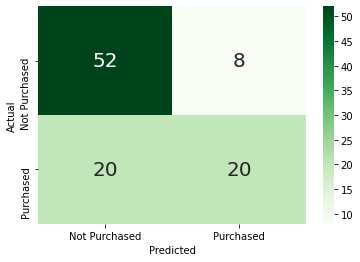

In [22]:
#Better Display of Confusion Matrix
Confusion=confusion_matrix(Y.astype(float), pred_class)
Confusion=sn.heatmap(Confusion,annot=True,cmap=("Greens"),
                     annot_kws={"size":20},
                    xticklabels=["Not Purchased","Purchased"],
                    yticklabels=["Not Purchased","Purchased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

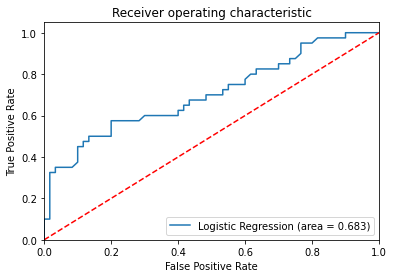

In [12]:
#Step6:ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y.astype(float), pred_class)
fpr, tpr, thresholds = roc_curve(Y.astype(float), pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
